In [ ]:
from google.colab import files
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import cv2
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import files
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import cv2
from sklearn.model_selection import KFold

Import the Data

In [ ]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Print Shape of the data
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_train shape:", x_test.shape, "y_train shape:", y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_train shape: (10000, 28, 28) y_train shape: (10000,)


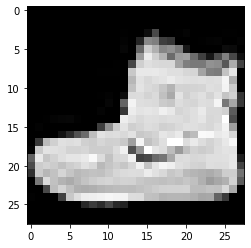

In [ ]:
plt.imshow(x_train[0,:,:], cmap="gray")

Visualize the Data

In [ ]:
# label the data
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

In [ ]:
# label the data
fashion_mnist_labels2 = ["0: T-shirt/top",  # index 0
                        "1: Trouser",      # index 1
                        "2: Pullover",     # index 2 
                        "3: Dress",        # index 3 
                        "4: Coat",         # index 4
                        "5: Sandal",       # index 5
                        "6: Shirt",        # index 6 
                        "7: Sneaker",      # index 7 
                        "8: Bag",          # index 8 
                        "9: Ankle boot"]   # index 9

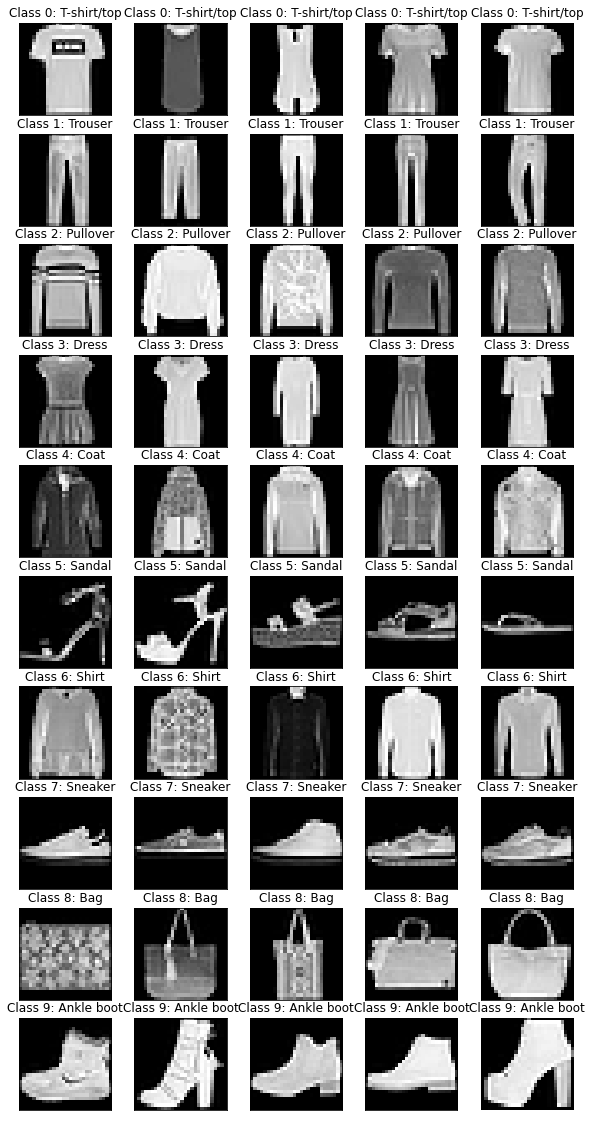

In [ ]:
# visualize the data
f, axes = plt.subplots(10,5,figsize=(5*2,10*2))
plt.axis('off')
for c in range(10):
    class_examples = x_train[(y_train==c).ravel()]
    for i in range(5):
        ax = axes[c,i]
        ax.imshow(class_examples[i].squeeze(),cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title('Class {}'.format(fashion_mnist_labels2[c]))

Normalize the Data

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# break data into train and validate
(x_train_1, x_valid_1) = x_train[12000:], x_train[:12000] 
(y_train_1, y_valid_1) = y_train[12000:], y_train[:12000]

# reshape data
w, h = 28, 28
x_train_1 = x_train_1.reshape(x_train_1.shape[0], w, h, 1)
x_valid_1 = x_valid_1.reshape(x_valid_1.shape[0], w, h, 1)
x_test_1 = x_test.reshape(x_test.shape[0], w, h, 1)


y_train_1 = tf.keras.utils.to_categorical(y_train_1, 10)
y_valid_1 = tf.keras.utils.to_categorical(y_valid_1, 10)
y_test_1 = tf.keras.utils.to_categorical(y_test, 10)

x_train shape: (48000, 28, 28, 1) y_train shape: (48000, 10)
48000 train set
12000 validation set
10000 test set


Train Best Model for Fashion MNIST Dataset

In [ ]:
model_1 = tf.keras.Sequential()

model_1.add(Conv2D(64, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal', padding='same',input_shape=(28, 28, 1)))
model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.3))

model_1.add(Conv2D(128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal', padding='same',input_shape=(28, 28, 1)))
model_1.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.3))

model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28, 28, 1)))
model_1.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.3))

model_1.add(Flatten())
model_1.add(Dense(1024, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(10, activation='softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       1

In [ ]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_1.fit(x_train_1, y_train_1, batch_size=256, epochs=30, validation_data=(x_valid_1, y_valid_1))

Epoch 1/30
188/188 [==============================] - 16s 44ms/step - loss: 1.1113 - accuracy: 0.6405 - val_loss: 1.2623 - val_accuracy: 0.5493
Epoch 2/30
188/188 [==============================] - 7s 40ms/step - loss: 0.4158 - accuracy: 0.8429 - val_loss: 0.5715 - val_accuracy: 0.7793
Epoch 3/30
188/188 [==============================] - 8s 40ms/step - loss: 0.3370 - accuracy: 0.8769 - val_loss: 0.3382 - val_accuracy: 0.8709
Epoch 4/30
188/188 [==============================] - 8s 41ms/step - loss: 0.2931 - accuracy: 0.8913 - val_loss: 0.2688 - val_accuracy: 0.8970
Epoch 5/30
188/188 [==============================] - 8s 40ms/step - loss: 0.2785 - accuracy: 0.8974 - val_loss: 0.2397 - val_accuracy: 0.9099
Epoch 6/30
188/188 [==============================] - 8s 40ms/step - loss: 0.2543 - accuracy: 0.9057 - val_loss: 0.2332 - val_accuracy: 0.9135
Epoch 7/30
188/188 [==============================] - 8s 41ms/step - loss: 0.2341 - accuracy: 0.9143 - val_loss: 0.2097 - val_accuracy: 0.927

Evaluate Best Model for Fashion MNIST Dataset

In [ ]:
# # Load the weights with the best validation accuracy
# model_1.load_weights('model.weights.best.hdf5')

In [ ]:
# Evaluate the model on test set
score = model_1.evaluate(x_test_1, y_test_1, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9376999735832214


In [ ]:
y_hat_1 = model_1.predict(x_test_1)
pred_values_1 = []
class_names = range(10)
for i in range(10000):
  pred_values_1.append(class_names[y_hat_1[i].argmax()])

pred_values_1 = np.array(pred_values_1)
print(classification_report(y_test, pred_values_1, target_names=fashion_mnist_labels))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.89      0.89      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.93      0.90      0.92      1000
       Dress       0.94      0.95      0.94      1000
        Coat       0.87      0.94      0.91      1000
      Sandal       0.98      0.99      0.99      1000
       Shirt       0.84      0.79      0.81      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.98      0.99      0.99      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



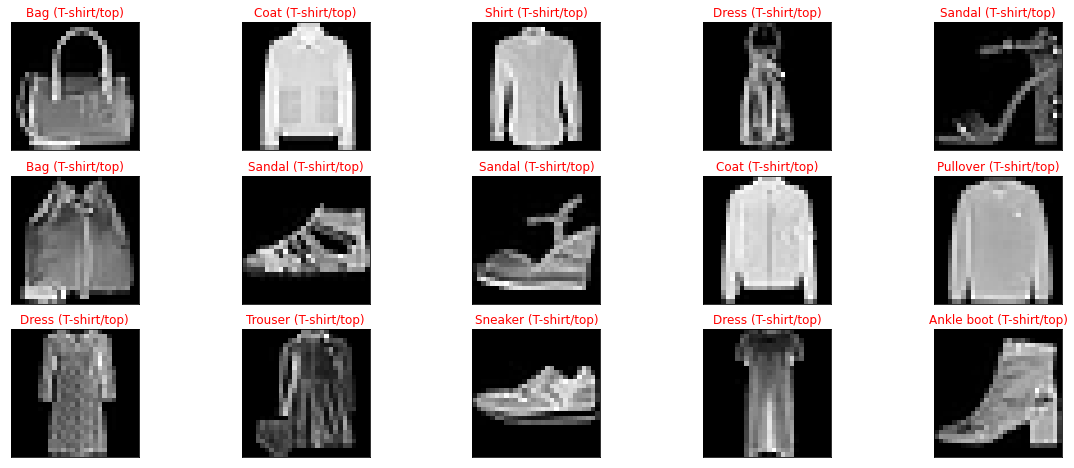

In [ ]:
y_hat_1 = model_1.predict(x_test_1)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # display each image
    ax.imshow(np.squeeze(x_test[index]), cmap="gray")
    predict_index = np.argmax(y_hat_1[index])
    true_index = np.argmax(y_test[index])
    # set the title for images
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Testing the model for Fashion MNIST dataset with K-fold Cross Validation

In [ ]:
def define_previous_model():
  model_1 = tf.keras.Sequential()

  model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28, 28, 1)))
  model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
  model_1.add(tf.keras.layers.BatchNormalization())
  model_1.add(MaxPooling2D(pool_size=(2, 2)))
  model_1.add(Dropout(0.3))

  model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28, 28, 1)))
  model_1.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
  model_1.add(tf.keras.layers.BatchNormalization())
  model_1.add(MaxPooling2D(pool_size=(2, 2)))
  model_1.add(Dropout(0.3))

  model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28, 28, 1)))
  model_1.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
  model_1.add(tf.keras.layers.BatchNormalization())
  model_1.add(MaxPooling2D(pool_size=(2, 2)))
  model_1.add(Dropout(0.3))

  model_1.add(Flatten())
  model_1.add(Dense(1024, activation='relu'))
  model_1.add(Dropout(0.3))
  model_1.add(Dense(256, activation='relu'))
  model_1.add(Dropout(0.3))
  model_1.add(Dense(10, activation='softmax'))

  model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model_1

In [ ]:
# evaluate a model using k-fold cross-validation
def evaluate_previous_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		model = define_previous_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [ ]:
def summarize_performance(scores):
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
	pyplot.boxplot(scores)
	pyplot.show()

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		pyplot.subplot(211)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [ ]:
# evaluate model
scores_previous, histories_previous = evaluate_previous_model(x_train_1, y_train_1)

> 92.167


Accuracy: mean=92.542 std=0.291, n=5


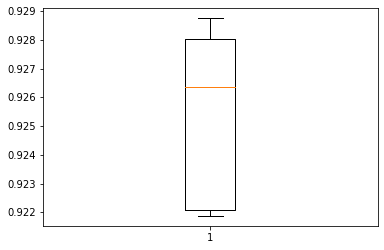

In [ ]:
summarize_performance(scores_previous)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


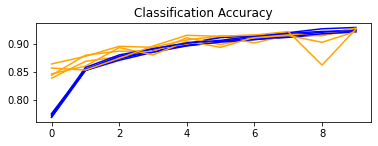

In [ ]:
summarize_diagnostics(histories_previous)

Sobel Edge Detector

In [ ]:
# Initialize Edge Detectors
sobelX = np.divide(np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), 8)
sobelX

array([[-0.125,  0.   ,  0.125],
       [-0.25 ,  0.   ,  0.25 ],
       [-0.125,  0.   ,  0.125]])

In [ ]:
sobelY = np.divide(np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]), 8)
sobelY

array([[-0.125, -0.25 , -0.125],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.125,  0.25 ,  0.125]])

In [ ]:
def sobelFilter(img, sobelX, sobelY):
  imgSobelX = scipy.signal.convolve2d(img ,sobelX,'same')
  imgSobelY = scipy.signal.convolve2d(img,sobelY,'same')
  magnitude_gradient = np.sqrt(np.square(imgSobelX) + np.square(imgSobelY))
  magnitude_gradient_clean = magnitude_gradient > 1*magnitude_gradient.mean()

  im = magnitude_gradient_clean
  m, n = im.shape; 
  xs = np.arange(1,n-1); 
  ys = np.arange(1,m-1);
  xpeaks = (im[ys][:,xs-1] <= im[ys][:,xs]) & (im[ys][:,xs] > im[ys][:,xs+1])
  ypeaks = (im[ys-1][:,xs] <= im[ys][:,xs]) & (im[ys][:,xs] > im[ys+1][:,xs])
  im = im[ys][:,xs].astype(bool) & ( xpeaks | ypeaks )

  return im

In [ ]:
x_train_filtered = []

for img in x_train:
  x_filtered = sobelFilter(img, sobelX, sobelY)
  x_train_filtered.append(x_filtered)
  

In [ ]:
x_train_filtered = np.array(x_train_filtered)
x_train_filtered.shape

(60000, 26, 26)

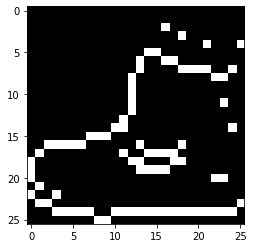

In [ ]:
plt.imshow(x_train_filtered[0, :, :], cmap="gray")

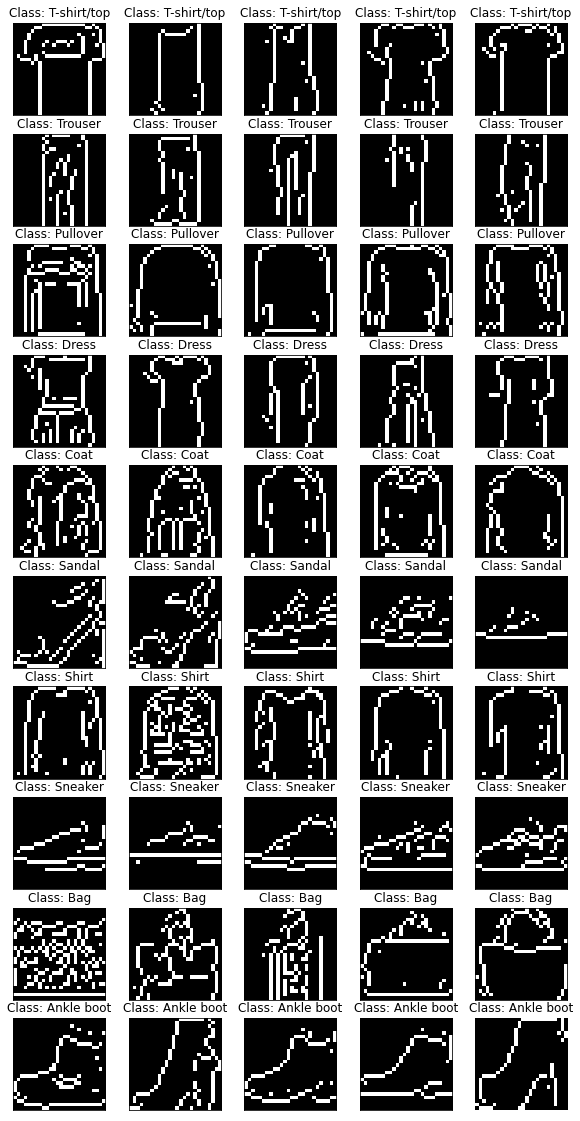

In [ ]:
f, axes = plt.subplots(10,5,figsize=(5*2,10*2))
plt.axis('off')
for c in range(10):
    class_examples = x_train_filtered[(y_train==c).ravel()]
    for i in range(5):
        ax = axes[c,i]
        ax.imshow(class_examples[i].squeeze(),cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title('Class: {}'.format(fashion_mnist_labels[c]))

In [ ]:
x_test_filtered = []

for img in x_test:
  x_test_img = sobelFilter(img, sobelX, sobelY)
  x_test_filtered.append(x_test_img)

In [ ]:
x_test_filtered = np.array(x_test_filtered)
x_test_filtered.shape

(10000, 26, 26)

In [ ]:
x_train_filtered.shape

(60000, 26, 26)

In [ ]:
edgemap_test = np.empty((10000,28,28), dtype=float, order='C')
edgemap_train = np.empty((60000,28,28), dtype=float, order='C')

i = 0
for img in x_train_filtered:
  img = np.pad(img,1)
  img = img.reshape(28,28)
  edgemap_train[i,:,:] = img[:,:]
  i = i + 1

i = 0
for img in x_test_filtered:
  img = np.pad(img,1)
  img = img.reshape(28,28)
  edgemap_test[i,:,:] = img[:,:]
  i = i + 1


In [ ]:
edgemap_test.shape
edgemap_train.shape

(60000, 28, 28)

In [ ]:
# break into training and validation sets
(x_train_2, x_valid_2) = edgemap_train[5000:], edgemap_train[:5000] 
(y_train_2, y_valid_2) = y_train[5000:], y_train[:5000]

# reshape the data
w, h = 28, 28
x_train_2 = x_train_2.reshape(x_train_2.shape[0], w, h, 1)
x_valid_2 = x_valid_2.reshape(x_valid_2.shape[0], w, h, 1)
x_test_2 = edgemap_test.reshape(edgemap_test.shape[0], w, h, 1)

y_train_2 = tf.keras.utils.to_categorical(y_train_2, 10)
y_valid_2 = tf.keras.utils.to_categorical(y_valid_2, 10)
y_test_2 = tf.keras.utils.to_categorical(y_test, 10)

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


Training the Data

In [ ]:
model_2 = tf.keras.Sequential()


model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28, 28, 1)))
model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
model_2.add(tf.keras.layers.BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.3))

model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28, 28, 1)))
model_2.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model_2.add(tf.keras.layers.BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.3))

model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28, 28, 1)))
model_2.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model_2.add(tf.keras.layers.BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.3))

model_2.add(Flatten())
model_2.add(Dense(1024, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)      

In [ ]:
model_2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model_2.fit(x_train_2,
         y_train_2,
         batch_size=64,
         epochs=30,
         validation_data=(x_valid_2, y_valid_2),
         callbacks=[checkpointer])

Epoch 1/30
860/860 [==============================] - 11s 12ms/step - loss: 0.2877 - accuracy: 0.8911 - val_loss: 0.2995 - val_accuracy: 0.8898

Epoch 00001: val_loss improved from inf to 0.29949, saving model to model.weights.best.hdf5
Epoch 2/30
860/860 [==============================] - 11s 12ms/step - loss: 0.2766 - accuracy: 0.8945 - val_loss: 0.3182 - val_accuracy: 0.8912

Epoch 00002: val_loss did not improve from 0.29949
Epoch 3/30
860/860 [==============================] - 11s 12ms/step - loss: 0.2683 - accuracy: 0.8985 - val_loss: 0.3182 - val_accuracy: 0.8876

Epoch 00003: val_loss did not improve from 0.29949
Epoch 4/30
860/860 [==============================] - 11s 13ms/step - loss: 0.2622 - accuracy: 0.9000 - val_loss: 0.3113 - val_accuracy: 0.8924

Epoch 00004: val_loss did not improve from 0.29949
Epoch 5/30
860/860 [==============================] - 11s 12ms/step - loss: 0.2530 - accuracy: 0.9031 - val_loss: 0.3179 - val_accuracy: 0.8888

Epoch 00005: val_loss did not 

In [ ]:
y_hat_2 = model_2.predict(x_test_2)
pred_values_2 = []
class_names = range(10)
for i in range(10000):
  pred_values_2.append(class_names[y_hat_2[i].argmax()])

pred_values_2 = np.array(pred_values_2)
print(classification_report(y_test, pred_values_2, target_names=fashion_mnist_labels))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.84      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.80      0.80      0.80      1000
       Dress       0.88      0.89      0.88      1000
        Coat       0.79      0.80      0.79      1000
      Sandal       0.97      0.93      0.95      1000
       Shirt       0.68      0.66      0.67      1000
     Sneaker       0.91      0.95      0.93      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



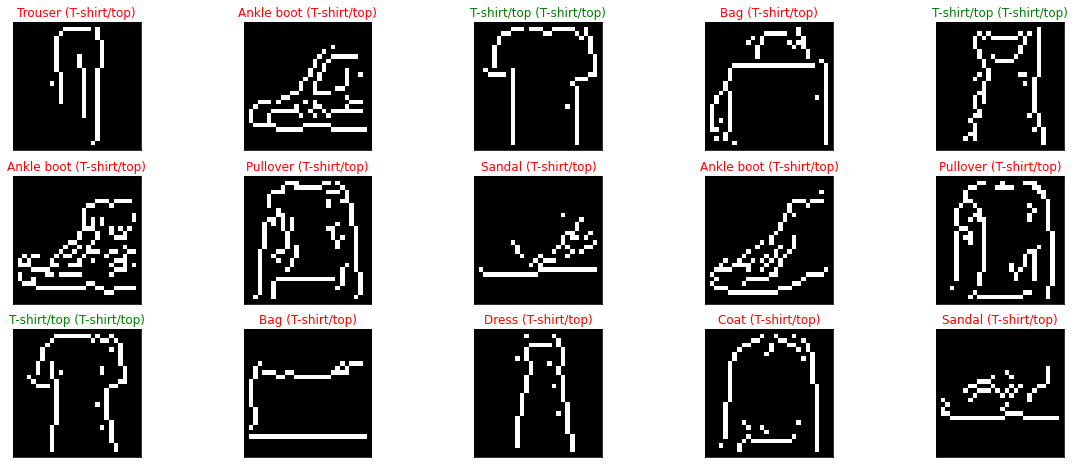

In [ ]:
y_hat_2 = model_2.predict(x_test_2)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test_2[index]), cmap="gray")
    predict_index = np.argmax(y_hat_2[index])
    true_index = np.argmax(y_test[index])
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

K-Fold Cross Validation on EdgeMaps of Fashion MNIST dataset

In [ ]:
scores_previous, histories_previous = evaluate_previous_model(x_train_2, y_train_2)

> 87.991
> 88.173
> 87.536
> 87.027
> 87.564


Accuracy: mean=87.658 std=0.399, n=5


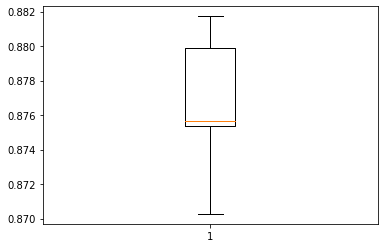

In [ ]:
summarize_performance(scores_previous)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


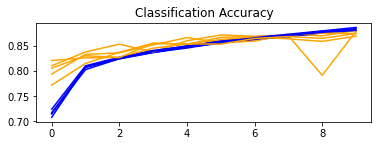

In [ ]:
summarize_diagnostics(histories_previous)

Determine Best Model Accuracy for EdgeMaps of Fashion MNIST dataset

In [ ]:
model_2.load_weights('model.weights.best.hdf5')

In [ ]:
score = model_2.evaluate(x_test_2, y_test_2, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8781999945640564


In [ ]:
y_hat_2 = model_2.predict(x_test_2)

pred_values_2 = []
class_names = range(10)
for i in range(10000):
  pred_values_2.append(class_names[y_hat_2[i].argmax()])

pred_values_2 = np.array(pred_values_2)
confusion_matrix(y_test, pred_values_2)

array([[757,   2,  24,  34,   5,   0, 172,   0,   6,   0],
       [  1, 969,   0,  24,   1,   0,   3,   0,   2,   0],
       [  3,   0, 783,  14, 108,   0,  91,   0,   1,   0],
       [  4,  10,   8, 902,  32,   0,  40,   0,   3,   1],
       [  0,   1,  71,  44, 775,   0, 106,   0,   3,   0],
       [  0,   0,   0,   0,   0, 976,   0,  17,   1,   6],
       [ 73,   5,  87,  39,  65,   0, 717,   0,  14,   0],
       [  0,   0,   0,   0,   0,  63,   0, 915,   0,  22],
       [  2,   0,   3,   4,   2,   0,   5,   0, 984,   0],
       [  0,   0,   0,   0,   0,  17,   1,  32,   2, 948]])

Visualize our predictions on the Edgemap dataset

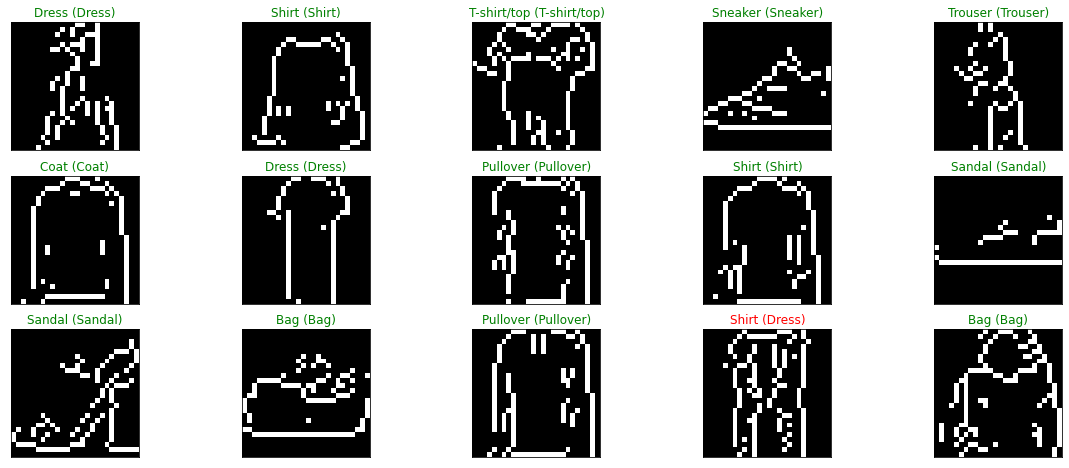

In [ ]:
y_hat = model_2.predict(x_test_2)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test_2[index]), cmap="gray")
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test_2[index])
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Improve Preprocessing of EdgeMap Dataset - add Gaussian Blur

Upon inspection of edge maps of Sobel-filtered images, we have realized that because our pixel dimesions are very small (only a 28x28 image), the edges are localized too strictly. We will now blur the image to to get an "area" around which the edge occurs. Instead of getting a single pixel, we will get whereabouts of the image.

In [ ]:
x_train_blurred = []

for img in x_train_filtered:
  x_blurred = scipy.ndimage.gaussian_filter(img, 0.12)
  x_train_blurred.append(x_blurred)

In [ ]:
x_train_blurred = np.array(x_train_blurred)
x_train_blurred.shape

(60000, 26, 26)

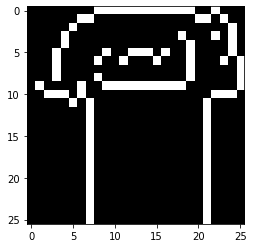

In [ ]:
plt.imshow(x_train_blurred[1, :, :], cmap="gray")

In [ ]:
x_test_blurred = []

for img in x_test_filtered:
  x_test_img = scipy.ndimage.gaussian_filter(img, 0.12)
  x_test_blurred.append(x_test_img)

In [ ]:
x_test_blurred = np.array(x_test_blurred)
x_test_blurred.shape

(10000, 26, 26)

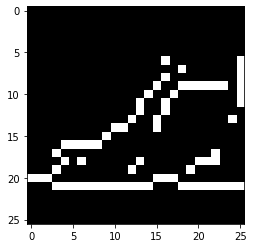

In [ ]:
plt.imshow(x_test_blurred[0, :, :], cmap="gray")

In [ ]:
# break into testing and validation sets
(x_train_3, x_valid_3) = x_train_blurred[5000:], x_train_blurred[:5000] 
(y_train_3, y_valid_3) = y_train[5000:], y_train[:5000]

# reshape the data
w, h = 26, 26
x_train_3 = x_train_3.reshape(x_train_3.shape[0], w, h, 1)
x_valid_3 = x_valid_3.reshape(x_valid_3.shape[0], w, h, 1)
x_test_3 = x_test_blurred.reshape(x_test_blurred.shape[0], w, h, 1)

y_train_3 = tf.keras.utils.to_categorical(y_train_3, 10)
y_valid_3 = tf.keras.utils.to_categorical(y_valid_3, 10)
y_test_3 = tf.keras.utils.to_categorical(y_test, 10)

x_train shape: (55000, 26, 26, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [ ]:
model_1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model_1.fit(x_train_3,
         y_train_3,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid_3, y_valid_3),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 14s 17ms/step - loss: 0.3063 - accuracy: 0.8872 - val_loss: 0.3478 - val_accuracy: 0.8776

Epoch 00001: val_loss improved from inf to 0.34779, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 14s 17ms/step - loss: 0.2930 - accuracy: 0.8933 - val_loss: 0.3505 - val_accuracy: 0.8868

Epoch 00002: val_loss did not improve from 0.34779
Epoch 3/10
860/860 [==============================] - 15s 17ms/step - loss: 0.2792 - accuracy: 0.8969 - val_loss: 0.3279 - val_accuracy: 0.8842

Epoch 00003: val_loss improved from 0.34779 to 0.32788, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 15s 17ms/step - loss: 0.2655 - accuracy: 0.9013 - val_loss: 0.3694 - val_accuracy: 0.8820

Epoch 00004: val_loss did not improve from 0.32788
Epoch 5/10
860/860 [==============================] - 14s 17ms/step - loss: 0.2589 - accuracy: 0.9041 - val_loss: 0.3445 - val_acc

Determine Best Model Accuracy for Blurred EdgeMaps of Fashion MNIST dataset

In [ ]:
model_1.load_weights('model.weights.best.hdf5')

In [ ]:
score = model_3.evaluate(x_test_3, y_test_3, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8652999997138977


In [ ]:
y_hat_3 = model_3.predict(x_test_3)

pred_values_3 = []
class_names = range(10)
for i in range(10000):
  pred_values_3.append(class_names[y_hat_3[i].argmax()])

pred_values_3 = np.array(pred_values_3)
confusion_matrix(y_test, pred_values_3)

array([[816,   2,   7,  19,   7,   0, 141,   0,   8,   0],
       [  0, 972,   0,  15,   4,   0,   6,   0,   3,   0],
       [ 16,   0, 721,   9, 140,   0, 109,   0,   5,   0],
       [ 13,  21,   7, 874,  33,   0,  46,   0,   5,   1],
       [  1,   2,  52,  36, 804,   0, 100,   0,   5,   0],
       [  0,   0,   0,   0,   0, 942,   0,  45,   1,  12],
       [100,   8,  72,  26,  97,   0, 683,   0,  14,   0],
       [  0,   0,   0,   0,   0,  46,   0, 929,   0,  25],
       [  1,   1,   2,   5,   5,   3,   9,   1, 972,   1],
       [  1,   0,   0,   0,   0,  11,   0,  48,   0, 940]])

Create the Combined Dataset

In [ ]:
new_images_test = np.empty((10000,56,28), dtype=float, order='C')
new_images_train = np.empty((60000,56,28), dtype=float, order='C')

i = 0
for img1, img2 in zip(x_train, x_train_filtered):
  img2 = np.pad(img2,1)
  img = np.append(img2.flat, img1.flat)
  img = img.reshape(56,28)
  new_images_train[i,:,:] = img[:,:]
  i = i + 1

i = 0
for img1, img2 in zip(x_test, x_test_filtered):
  img2 = np.pad(img2,1)
  img = np.append(img2.flat, img1.flat)
  img = img.reshape(56,28)
  new_images_test[i,:,:] = img[:,:]
  i = i + 1

In [ ]:
new_images_test.shape


(10000, 56, 28)

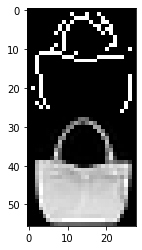

In [ ]:
plt.imshow(new_images_train[100,:,:],cmap='gray')

In [ ]:
model_3 = tf.keras.Sequential()

model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(56, 28, 1)))
model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
model_3.add(tf.keras.layers.BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3))

model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(56, 28, 1)))
model_3.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model_3.add(tf.keras.layers.BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3))

model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(56, 28, 1)))
model_3.add(Conv2D(128,  kernel_size=(3, 3), padding='same',activation='relu'))
model_3.add(tf.keras.layers.BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3))

model_3.add(Flatten())
model_3.add(Dense(1024, activation='relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(NUM_CLASSES, activation='softmax'))

model_3.summary()

In [ ]:
def define_latest_model():

  model_3 = tf.keras.Sequential()

  model_3.add(Conv2D(64, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal', padding='same', input_shape=(56, 28, 1)))
  model_3.add(Conv2D(64,  kernel_size=(3, 3),  activation='relu',padding='same'))
  model_3.add(tf.keras.layers.BatchNormalization())
  model_3.add(MaxPooling2D(pool_size=(2, 2)))
  model_3.add(Dropout(0.3))

  model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(56, 28, 1)))
  model_3.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
  model_3.add(tf.keras.layers.BatchNormalization())
  model_3.add(MaxPooling2D(pool_size=(2, 2)))
  model_3.add(Dropout(0.3))

  model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(56, 28, 1)))
  model_3.add(Conv2D(128, kernel_size=(3, 3), padding='same',activation='relu'))
  model_3.add(tf.keras.layers.BatchNormalization())
  model_3.add(MaxPooling2D(pool_size=(2, 2)))
  model_3.add(Dropout(0.3))

  model_3.add(Flatten())
  model_3.add(Dense(1024, activation='relu'))
  model_3.add(Dropout(0.3))
  model_3.add(Dense(256, activation='relu'))
  model_3.add(Dropout(0.3))
  model_3.add(Dense(NUM_CLASSES, activation='softmax'))

  model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model_3


In [ ]:
# evaluate a model using k-fold cross-validation
def evaluate_latest_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_latest_model()
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [ ]:
scores_previous, histories_previous = evaluate_latest_model(x_train_4, y_train_4)

> 92.309
> 92.691
> 91.991
> 91.782
> 92.300


Accuracy: mean=92.215 std=0.310, n=5


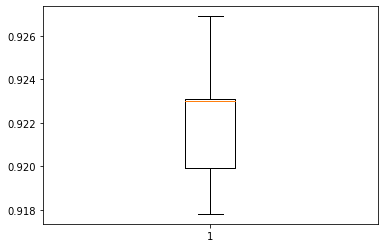

In [ ]:
summarize_performance(scores_previous)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


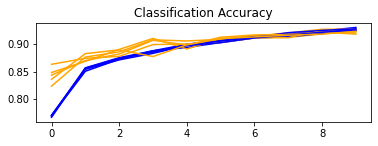

In [ ]:
summarize_diagnostics(histories_previous)

In [ ]:
# split into training and validation sets
(x_train_4, x_valid_4) = new_images_train[5000:], new_images_train[:5000] 
(y_train_4, y_valid_4) = y_train[5000:], y_train[:5000]

# reshape data
w, h = 56, 28
x_train_4 = x_train_4.reshape(x_train_4.shape[0], w, h, 1)
x_valid_4 = x_valid_4.reshape(x_valid_4.shape[0], w, h, 1)
x_test_4 = new_images_test.reshape(new_images_test.shape[0], w, h, 1)

y_train_4 = tf.keras.utils.to_categorical(y_train_4, 10)
y_valid_4 = tf.keras.utils.to_categorical(y_valid_4, 10)
y_test_4 = tf.keras.utils.to_categorical(y_test, 10)

x_train shape: (55000, 56, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [ ]:
model_3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
history = model_3.fit(x_train_4,
         y_train_4,
         batch_size=128,
         epochs=30,
         validation_data=(x_valid_4, y_valid_4),
         callbacks=[checkpointer])

Epoch 1/30
430/430 [==============================] - 18s 42ms/step - loss: 0.4306 - accuracy: 0.8433 - val_loss: 0.3354 - val_accuracy: 0.8742

Epoch 00001: val_loss improved from inf to 0.33536, saving model to model.weights.best.hdf5
Epoch 2/30
430/430 [==============================] - 17s 41ms/step - loss: 0.3454 - accuracy: 0.8726 - val_loss: 0.2881 - val_accuracy: 0.8976

Epoch 00002: val_loss improved from 0.33536 to 0.28807, saving model to model.weights.best.hdf5
Epoch 3/30
430/430 [==============================] - 17s 40ms/step - loss: 0.3074 - accuracy: 0.8872 - val_loss: 0.2789 - val_accuracy: 0.8940

Epoch 00003: val_loss improved from 0.28807 to 0.27892, saving model to model.weights.best.hdf5
Epoch 4/30
430/430 [==============================] - 17s 40ms/step - loss: 0.2817 - accuracy: 0.8975 - val_loss: 0.2630 - val_accuracy: 0.8992

Epoch 00004: val_loss improved from 0.27892 to 0.26298, saving model to model.weights.best.hdf5
Epoch 5/30
430/430 [====================

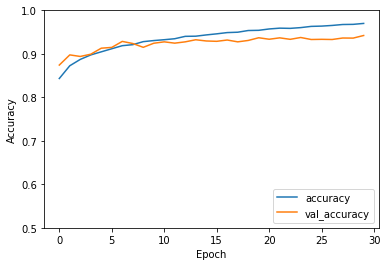

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
model_3.load_weights('model.weights.best.hdf5')

In [ ]:
score = model_3.evaluate(x_test_4, y_test_4, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9271000027656555


In [ ]:
y_hat_3 = model_3.predict(x_test_4)
pred_values_3 = []
class_names = range(10)
for i in range(10000):
  pred_values_3.append(class_names[y_hat_3[i].argmax()])

pred_values_3 = np.array(pred_values_3)
print(classification_report(y_test, pred_values_3, target_names=fashion_mnist_labels))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.91      0.88      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.91      0.89      0.90      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.87      0.91      0.89      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.81      0.75      0.78      1000
     Sneaker       0.97      0.96      0.97      1000
         Bag       0.98      0.99      0.99      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Confusion Matrix for Different Models to Compare groups that are mixed

In [ ]:
conf1 = confusion_matrix(y_test, pred_values_1)
conf2 = confusion_matrix(y_test, pred_values_2)
conf3 = confusion_matrix(y_test, pred_values_3)

In [ ]:
conf1

array([[887,   0,  17,   9,   5,   1,  72,   0,   9,   0],
       [  1, 987,   1,   7,   3,   0,   0,   0,   1,   0],
       [ 12,   2, 903,   5,  36,   0,  41,   0,   1,   0],
       [  9,   5,   7, 948,  19,   0,  11,   0,   1,   0],
       [  0,   1,  15,  15, 941,   0,  28,   0,   0,   0],
       [  0,   0,   0,   0,   0, 990,   0,   3,   0,   7],
       [ 82,   0,  30,  21,  71,   0, 791,   0,   5,   0],
       [  0,   0,   0,   0,   0,  13,   0, 967,   0,  20],
       [  1,   1,   0,   3,   1,   1,   2,   0, 991,   0],
       [  0,   0,   0,   0,   0,   4,   0,  24,   0, 972]])

In [ ]:
conf2

array([[864,   1,  19,  18,   5,   0,  87,   0,   6,   0],
       [  0, 954,   0,  35,   4,   0,   5,   0,   2,   0],
       [ 14,   0, 800,   9,  94,   0,  79,   0,   4,   0],
       [ 21,   4,   8, 889,  30,   0,  45,   0,   3,   0],
       [  1,   2,  88,  28, 795,   0,  84,   0,   2,   0],
       [  0,   0,   0,   0,   0, 928,   0,  61,   0,  11],
       [142,   2,  77,  31,  80,   0, 661,   0,   7,   0],
       [  0,   0,   0,   0,   0,  20,   0, 947,   0,  33],
       [  4,   0,   5,   3,   4,   0,   4,   1, 979,   0],
       [  0,   0,   0,   0,   0,   5,   1,  29,   0, 965]])

In [ ]:
conf3

array([[907,   0,  17,  12,   3,   0,  56,   0,   5,   0],
       [  1, 979,   0,  13,   4,   0,   1,   0,   2,   0],
       [ 18,   1, 885,   7,  41,   0,  48,   0,   0,   0],
       [  8,   0,   5, 931,  36,   0,  17,   0,   2,   1],
       [  0,   0,  19,  11, 913,   0,  56,   0,   1,   0],
       [  0,   0,   0,   0,   0, 987,   0,   7,   0,   6],
       [131,   0,  44,  20,  49,   0, 750,   0,   6,   0],
       [  0,   0,   0,   0,   0,   7,   0, 963,   0,  30],
       [  3,   0,   1,   5,   0,   2,   2,   1, 986,   0],
       [  0,   0,   1,   0,   0,   5,   0,  24,   0, 970]])

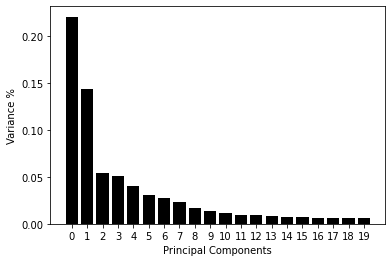

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = x_train.reshape(-1,x_train.shape[1]*x_train.shape[2])
X_std = StandardScaler().fit_transform(df)

# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(features)
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

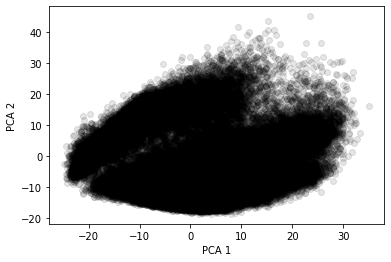

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
X = x_train.reshape(-1,x_train.shape[1]*x_train.shape[2])
Clus_dataSet = StandardScaler().fit_transform(X)
variance = 0.98
pca = PCA(variance)

In [ ]:
pca.fit(Clus_dataSet)

PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

3


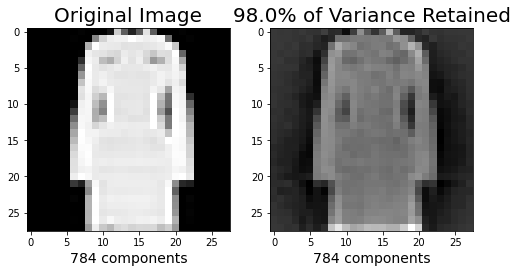

In [ ]:
plt.figure(figsize=(8,4));

n = 500 #index value, change to view different data

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X[n].reshape(x_train.shape[1], x_train.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(X.shape[1])+' components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 196 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[n].reshape(x_train.shape[1], x_train.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(Clus_dataSet.shape[1]) +' components', fontsize = 14)
plt.title(str(variance * 100) + '% of Variance Retained', fontsize = 20);

print(y_train[n])

In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 10, n_init = 35)

In [ ]:
k_means.fit(Clus_dataSet)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=35, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
k_means_labels = k_means.labels_ #List of labels of each dataset
print("The list of labels of the clusters are " + str(np.unique(k_means_labels)))

The list of labels of the clusters are [0 1 2 3 4 5 6 7 8 9]


In [ ]:
G = len(np.unique(k_means_labels)) #Number of labels

#2D matrix  for an array of indexes of the given label
cluster_index= [[] for i in range(G)]
for i, label in enumerate(k_means_labels,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue

In [ ]:
y = y_train
Y_clust = [[] for i in range(G)]
for n in range(G):
    Y_clust[n] = y[cluster_index[n]] #Y_clust[0] contains array of "correct" category from y_train for the cluster_index[0]
    assert(len(Y_clust[n]) == len(cluster_index[n])) #dimension confirmation

In [ ]:
#counts the number of each category in each cluster
def counter(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    label_index = dict(zip(unique, counts))
    return label_index

In [ ]:
label_count= [[] for i in range(G)]
for n in range(G):
    label_count[n] = counter(Y_clust[n])

label_count[1] #Number of items of a certain category in cluster 1

{0: 1670, 1: 154, 2: 1731, 3: 665, 4: 1080, 5: 35, 6: 2091, 8: 564, 9: 52}

In [ ]:
class_names = {0:'T-shirt/top', 1:'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5:
               'Sandal',6: 'Shirt', 7:'Sneaker',8:  'Bag',9: 'Ankle boot'} #Dictionary of class names

#A function to plot a bar graph for visualising the number of items of certain category in a cluster
def plotter(label_dict):
    plt.bar(range(len(label_dict)), list(label_dict.values()), align='center')
    a = []
    for i in [*label_dict]: a.append(class_names[i])
    plt.xticks(range(len(label_dict)), list(a), rotation=45, rotation_mode='anchor')

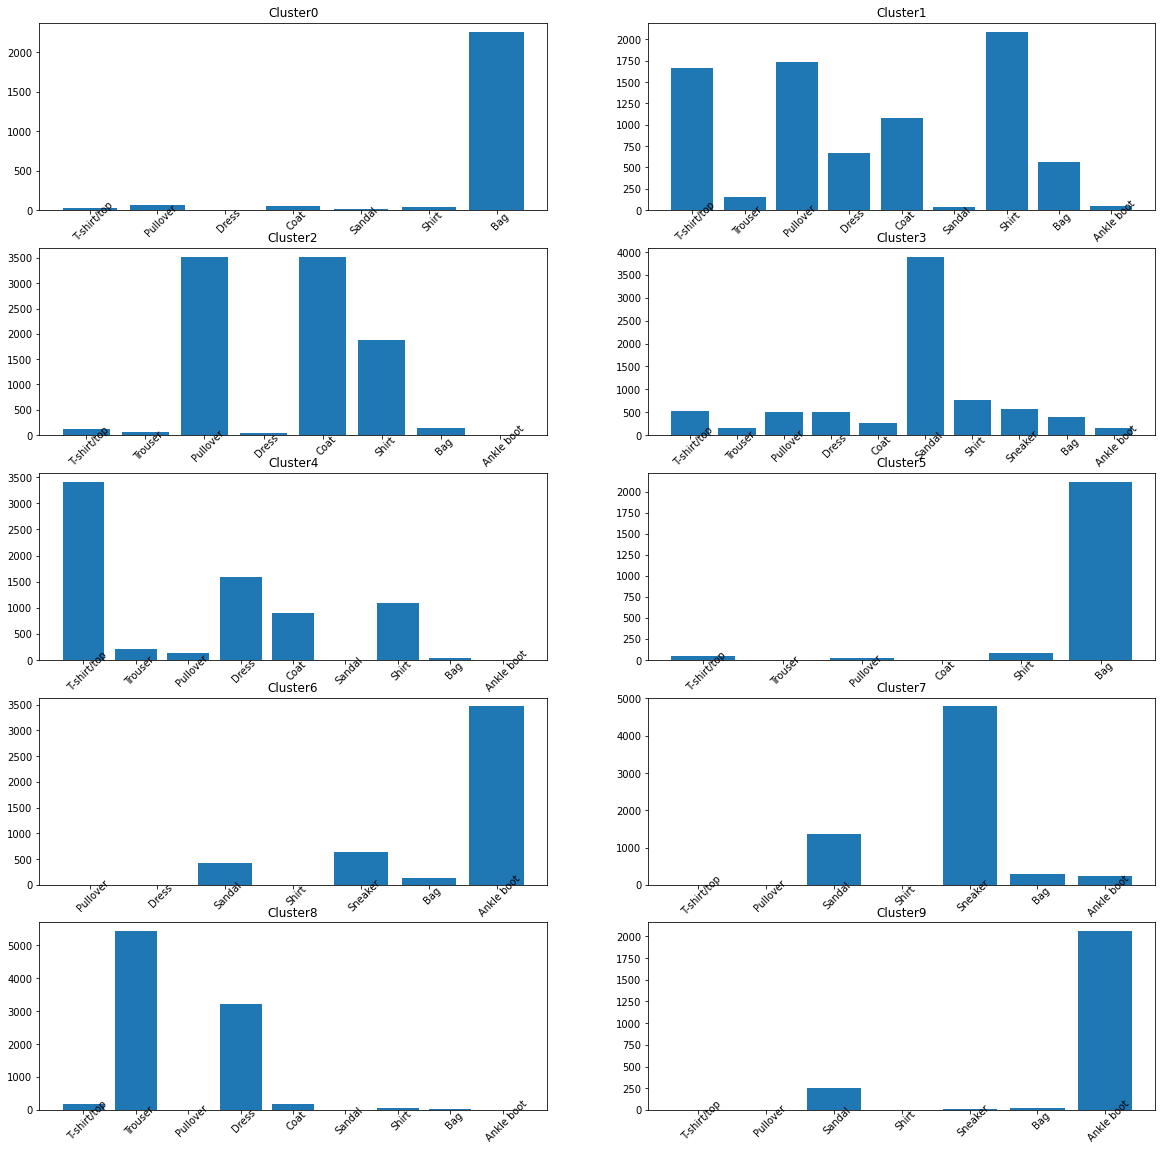

In [ ]:
plt.figure(figsize=(20,20))
for i in range (1,11):
    plt.subplot(5, 2, i)
    plotter(label_count[i-1]) 
    plt.title("Cluster" + str(i-1))

Create Custom Dataset

In [ ]:
custom_test_x = []

In [ ]:
custom_test_y = []

In [ ]:
# Upload images
from google.colab import files
uploaded = files.upload()

Saving boot1.png to boot1.png


In [ ]:
image_file = 'boot1.png' # Replace with uploaded image name

In [ ]:
def convert_image(image_file):
  img = np.array(Image.open(image_file).convert('L'))
  image_png = Image.fromarray(img)
  image = image_png.resize([28, 28], Image.ANTIALIAS)
  img_array = np.array(image)
  img_array = img_array.astype('float')/255
  print(img_array.shape)
  plt.imshow(img_array, cmap='gray')
  custom_test_x.append(img_array)
  custom_test_y.append(9) # CHANGE THIS DEPENDING ON THE OBJECT LABEL

(28, 28)


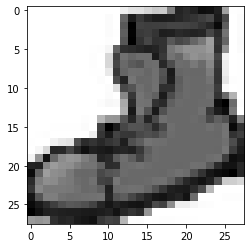

In [ ]:
convert_image(image_file)

In [ ]:
custom_array_x = np.array(custom_test_x)
custom_array_x.shape

(10, 28, 28)

In [ ]:
custom_array_y = np.array(custom_test_y)
custom_array_y.shape
custom_array_y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
custom_array_backup = custom_array_x
custom_array_backup2 = custom_array_y

Evaluate Model Trained on EdgeMaps and Images on the Custom Dataset

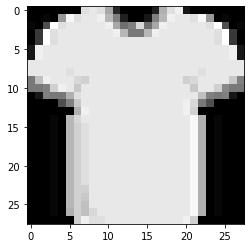

In [ ]:
plt.imshow(custom_array_x[0,:,:], cmap="gray")

In [ ]:
custom_array_x = custom_array_x.reshape(custom_array_x.shape[0], 28, 28, 1)

In [ ]:
y_hats = model_1.predict(custom_array_x)

In [ ]:
pred_values = []
class_names = range(10)
for i in range(10):
  pred_values.append(class_names[y_hats[i].argmax()])

pred_values = np.array(pred_values)

In [ ]:
y_hats

array([[3.38193953e-01, 8.66474503e-10, 1.42019587e-06, 9.85334282e-07,
        2.63727173e-09, 4.02928663e-11, 6.61803722e-01, 1.73614387e-11,
        8.04634404e-09, 4.08019001e-11],
       [5.22511173e-03, 8.09534043e-02, 1.24908605e-04, 1.38465809e-02,
        1.98733360e-01, 3.07128939e-05, 4.76511091e-01, 7.57429807e-05,
        2.22615227e-01, 1.88389095e-03],
       [4.73314553e-01, 2.00336770e-04, 1.69809647e-02, 1.86922553e-03,
        2.28277408e-04, 1.23229538e-05, 5.06938159e-01, 1.88953936e-06,
        4.00838064e-04, 5.34975952e-05],
       [6.64583500e-03, 3.17131891e-03, 1.08203972e-02, 1.95667055e-02,
        7.20149338e-01, 7.89442798e-04, 1.02400966e-01, 1.70744141e-03,
        1.33923054e-01, 8.25512339e-04],
       [2.46819947e-02, 4.43233032e-04, 1.97728304e-03, 4.09325818e-03,
        1.62692543e-03, 2.94920096e-06, 9.62654173e-01, 7.40464827e-07,
        4.50429320e-03, 1.52234261e-05],
       [7.57324174e-02, 1.01677133e-05, 7.83282425e-03, 6.15736235e-06,
   

In [ ]:
pred_values

array([6, 6, 6, 4, 6, 8, 6, 7, 8, 8])

In [ ]:
custom_array_y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
y_hats = model_2.predict(custom_array_x)

In [ ]:
pred_values = []
class_names = range(10)
for i in range(10):
  pred_values.append(class_names[y_hats[i].argmax()])

pred_values = np.array(pred_values)

In [ ]:
pred_values

array([2, 8, 8, 8, 8, 8, 8, 8, 8, 8])